This is a very basic jupyter tutorial for the Hereditary Depth First Search (HDFS) from the pathfinder module.

The aim of this exercise is to identify the optimum subset of elements where elements could refer to a sets of features for ML training, Linear Regression or experimental observables. Given access to a pair wise relation matrix - e.g. Pearson Correlation, Fisher Information, Joint Mutual Information, ... - one can construct a Binary Acceptance Matrix (BAM) by defining a threshold (T) below which combination is allowed. The HDFS algorithm will efficiently identify all subsets of elements whose pairwise relations fall below T for all elements in the subset. Thus the HDFS algorithm provides a list of subsets containing minimally 'related' elements. 

In [1]:
# preamble
from math import isclose
import numpy as np
import pathfinder as pf
from pathfinder import plot_results

Set random seed for the pseudo data generation

In [2]:
seed = 0
np.random.seed(seed) 
print(f"seed = {seed}")

seed = 0


Here we will create the "Binary Acceptance Matrix" (BAM). \
\
The BAM ($\rho$) is a symmetric Boolean matrix that provides the pair-wise combination condition i.e element $i$ can be combined with elemet $j$ if $\rho_{ij}$ = True  \
\
For this example we will create a 'psudo' BAM by randomly generating matrix elements with Boolean values distributed as follows:

$ P(\rho_{ij}=True) = p$ \
\
 $P(\rho_{ij}=False) = 1-p$

In [3]:
N = 25                                                                          # Matrix size
p = 0.5                                                                         # Distribution of True values 
pseudo = np.triu(np.random.choice([True, False], size=(N,N), p=[p, 1-p]), 1)    # Construct BAM values 
pseudo += pseudo.T                                                              # Construct symmetric matrix

The aim of this exsersise is to identify the optimum subset of elements.
The HDFS algorithm identifies **all** allowed subsets elements using the Binary Acceptance Matrix.
To help choose the optimum set one can provide a list of weights which will give preference to the highest total path weight sum. 
If run without weight the "**find_paths**" method will return the longest paths as if uniformly weighted to 1.



<AxesSubplot:>

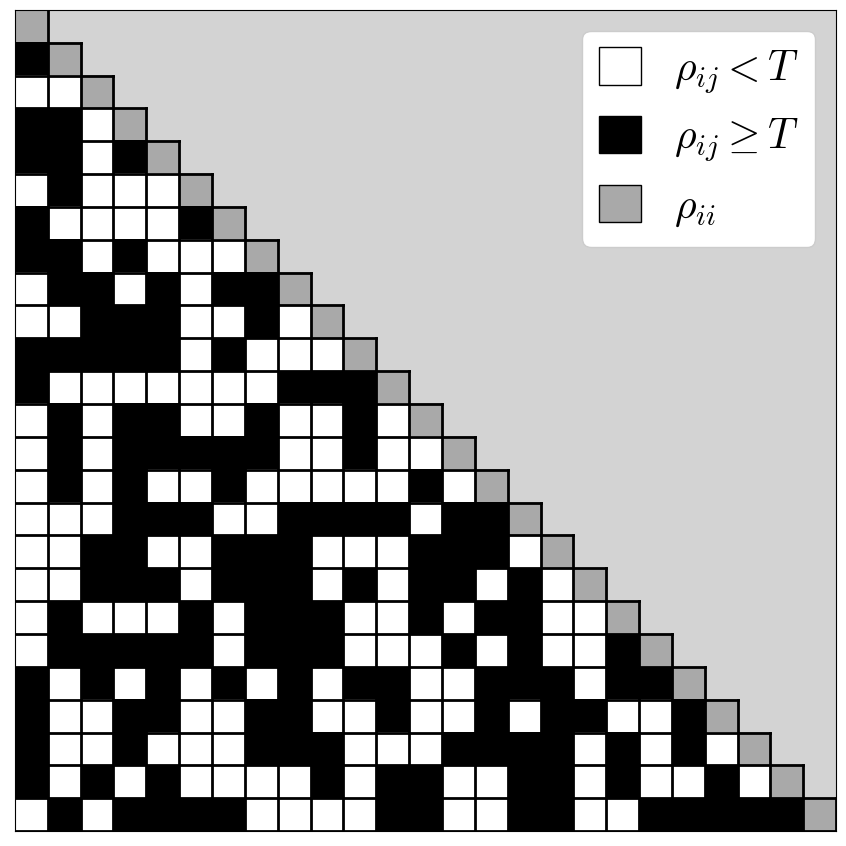

In [4]:
#weights= np.sort(np.random.rand(N))[::-1]                                       # Generate pseudo weights (descending order)
weights = np.random.rand(N)
bam = pf.BinaryAcceptance(pseudo, weights=weights)
index_map = bam.sort_bam_by_weight()                           # Provide pseudo BAM and Weights to BinaryAcceptance class
plot_results.plot(bam)                                                          # Plot the BAM

Provide the **BinaryAcceptance** Object to **HDFS** and run **find_paths** to get the top 5 results

In [5]:
hdfs = pf.HDFS(bam, top=5, ignore_subset=True)
hdfs.find_paths(verbose=True)

1: Path = [2, 4, 5, 7, 11, 14],  Weight = 4.499650470394825,
2: Path = [2, 4, 6, 7, 11],  Weight = 3.992302162921413,
3: Path = [0, 5, 8, 9, 12],  Weight = 3.8649178973867615,
4: Path = [0, 5, 8, 9, 14],  Weight = 3.707504655554509,
5: Path = [0, 8, 9, 12, 13],  Weight = 3.5387637906697584


Provide the **BinaryAcceptance** Object to **WHDFS** and run **find_paths** to get the top 5 results

In [6]:
whdfs = pf.WHDFS(bam, top=5, ignore_subset=True)
whdfs.find_paths(verbose=True)

1: Path = [2, 4, 5, 7, 11, 14],  Weight = 4.499650470394825,
2: Path = [2, 4, 6, 7, 11],  Weight = 3.992302162921413,
3: Path = [0, 5, 8, 9, 12],  Weight = 3.8649178973867615,
4: Path = [0, 5, 8, 9, 14],  Weight = 3.707504655554509,
5: Path = [0, 8, 9, 12, 13],  Weight = 3.5387637906697584


1: Path = [2, 4, 5, 7, 11, 14],  Weight = 4.499650470394825,  

2: Path = [2, 4, 6, 7, 11],  Weight = 3.992302162921413,  

3: Path = [0, 5, 8, 9, 12],  Weight = 3.8649178973867615,  

4: Path = [0, 5, 8, 9, 14],  Weight = 3.707504655554509,  

5: Path = [0, 8, 9, 12, 13],  Weight = 3.5387637906697584  


In [7]:
print("WHDFS == HDFS")
print(f"Object comparison: {whdfs.res == hdfs.res}")
print(f"Weight comparison: {all([isclose(w.weight, h.weight) for w, h in zip(whdfs.res, hdfs.res)])} (fp tolerance 1e-9)")
print(f"Path comparison:   {all([w.path == h.path for w, h in zip(whdfs.res, hdfs.res)])}")

WHDFS == HDFS
Object comparison: True
Weight comparison: True (fp tolerance 1e-9)
Path comparison:   True


Plot Results

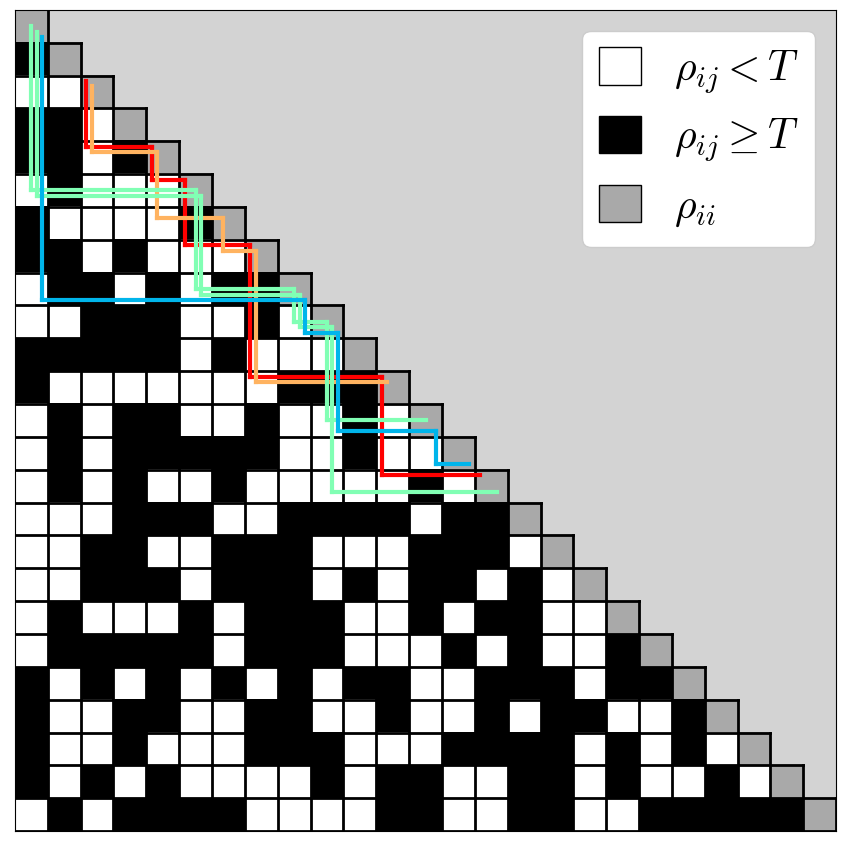

In [8]:
axis = plot_results.plot(bam, whdfs)

In this example we provided the weights and binary acceptance in an unsorted format. When '''bam.sort_bam_by_weight()''' is called the method returns an index map to the original unsorted order which can be used to recover the original index reference. 

In [9]:
whdfs.remap_path(index_map)

[Path = [1, 7, 15, 16, 22, 23],  Weight = 4.499650470394825,
 Path = [1, 9, 16, 22, 23],  Weight = 3.992302162921413,
 Path = [2, 13, 14, 15, 17],  Weight = 3.8649178973867615,
 Path = [2, 7, 14, 15, 17],  Weight = 3.707504655554509,
 Path = [2, 8, 13, 14, 17],  Weight = 3.5387637906697584]

In [10]:
whdfs.remap_path(index_map) ==  hdfs.remap_path(index_map)

True

In [11]:
(max(whdfs.remap_path(index_map)))

Path = [1, 7, 15, 16, 22, 23],  Weight = 4.499650470394825